In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,AveragePooling1D,Dropout,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from keras.layers.merge import concatenate
from keras.models import Model
from keras.layers import Input
import matplotlib.pyplot as plt

In [ ]:
X=pd.read_csv('/content/x.csv')
Patterns=pd.read_csv('/content/y.csv')

In [ ]:
encode_dic = {'nor': 0, 
              'cyc': 1, 
              'sys': 2, 
              'str': 3, 
              'ut': 4,
              'dt': 5, 
              'us': 6, 
              'ds': 7}
decode_dic = {0: 'nor',
              1: 'cyc',
              2: 'sys',
              3: 'str',
              4: 'ut',
              5: 'dt',
              6: 'us',
              7: 'ds'}

In [ ]:
Y= Patterns['pattern'].map(encode_dic).astype(int)

In [ ]:
Y.shape

(2736,)

In [ ]:
x_train=X.iloc[0:76800,1:].values
x_test=X.iloc[76800:87552,1:].values
y_train=Y.iloc[0:2400,].values
y_test=Y.iloc[2400:2736,].values

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((76800, 2), (10752, 2), (2400,), (336,))

In [ ]:
x_train= x_train.reshape((2400,32, 2))
x_test=x_test.reshape((336,32,2))

In [ ]:
model1 = Sequential()
model1.add(Conv1D(112,3 , activation="relu",strides=1, input_shape=(32,2)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(80, activation="relu"))
model1.add(Dense(8, activation = 'softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = "adam",
              metrics = ['accuracy']
              )

In [ ]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 30, 112)           784       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 15, 112)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1680)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 80)                134480    
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 648       
Total params: 135,912
Trainable params: 135,912
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size=64
epochs=210
model1_history=model1.fit(x_train, y_train,
                          epochs=epochs,
                          batch_size=64,
                          validation_data=(x_test, y_test)
                          )

Epoch 1/210
38/38 [==============================] - 0s 10ms/step - loss: 52.2844 - accuracy: 0.1292 - val_loss: 26.6467 - val_accuracy: 0.1280
Epoch 2/210
38/38 [==============================] - 0s 7ms/step - loss: 16.0661 - accuracy: 0.1183 - val_loss: 18.3890 - val_accuracy: 0.1280
Epoch 3/210
38/38 [==============================] - 0s 7ms/step - loss: 10.4863 - accuracy: 0.1321 - val_loss: 7.0778 - val_accuracy: 0.1905
Epoch 4/210
38/38 [==============================] - 0s 7ms/step - loss: 9.4566 - accuracy: 0.1367 - val_loss: 8.5901 - val_accuracy: 0.1310
Epoch 5/210
38/38 [==============================] - 0s 7ms/step - loss: 10.7746 - accuracy: 0.1408 - val_loss: 7.2690 - val_accuracy: 0.1577
Epoch 6/210
38/38 [==============================] - 0s 7ms/step - loss: 7.5961 - accuracy: 0.1587 - val_loss: 5.1161 - val_accuracy: 0.1488
Epoch 7/210
38/38 [==============================] - 0s 6ms/step - loss: 4.2779 - accuracy: 0.1717 - val_loss: 4.1923 - val_accuracy: 0.2024
Epoch 

In [ ]:
acc1 = model1.evaluate(x_train, y_train)

75/75 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8587


In [ ]:

print("Loss:", acc1[0], " Accuracy:", acc1[1])

Loss: 0.3151627480983734  Accuracy: 0.8587499856948853


In [ ]:
val_acc1 = model1.evaluate(x_test, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.8393


In [ ]:
print("Loss:", val_acc1[0], " Accuracy:", val_acc1[1])

Loss: 0.5576666593551636  Accuracy: 0.8392857313156128


In [ ]:
pred = model1.predict(x_test)
pred_y = pred.argmax(axis=-1)

In [ ]:
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[39  0  1  0  0  2  0  0]
 [ 0 42  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0]
 [40  0  0  1  0  0  0  1]
 [ 0  0  0  0 40  0  1  1]
 [ 1  0  0  0  1 39  0  1]
 [ 0  0  0  0  1  1 40  0]
 [ 0  1  0  0  0  2  0 39]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


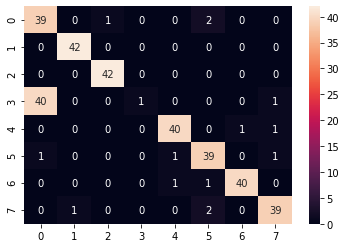

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

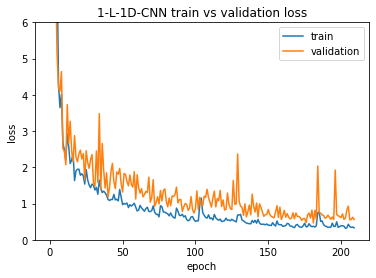

In [ ]:

plt.plot(model1_history.history['loss'])
plt.plot(model1_history.history['val_loss'])
plt.title('1-L-1D-CNN train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.ylim((0,6))
plt.show()

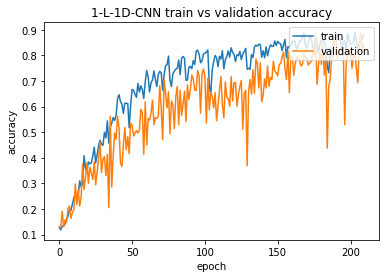

In [ ]:

plt.plot(model1_history.history['accuracy'])
plt.plot(model1_history.history['val_accuracy'])
plt.title('1-L-1D-CNN train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

inception layer

In [ ]:
input_layer=Input(shape=(32,2))
conv1=Conv1D(16,10,activation='relu',padding='same')(input_layer)
conv2=Conv1D(32,10,activation='relu',padding='same')(input_layer)
conv3=Conv1D(64,10,activation='relu',padding='same')(input_layer)
inception_layer=concatenate([conv1,conv2,conv3],axis=-1)
pool=MaxPooling1D(pool_size=2)(inception_layer)
conv4=Conv1D(112,10,activation='relu')(pool)
pool=MaxPooling1D(pool_size=2)(conv4)
flatten=Flatten()(pool)
layer=Dense(80,activation='relu')(flatten)
outer_layer=Dense(8,activation='softmax')(layer)
model2 = Model(inputs=input_layer, outputs=outer_layer)

In [ ]:
model2.compile(loss = 'sparse_categorical_crossentropy',
              optimizer ='adam',
              metrics = ['accuracy']
              )

In [ ]:
model2.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 32, 2)]      0                                            
__________________________________________________________________________________________________
conv1d_34 (Conv1D)              (None, 32, 16)       336         input_8[0][0]                    
__________________________________________________________________________________________________
conv1d_35 (Conv1D)              (None, 32, 32)       672         input_8[0][0]                    
__________________________________________________________________________________________________
conv1d_36 (Conv1D)              (None, 32, 64)       1344        input_8[0][0]                    
______________________________________________________________________________________

In [ ]:
batch_size=64
epochs=100
model2_history=model2.fit(x_train, y_train,
                          batch_size,
                          epochs=epochs,
                          validation_data=(x_test, y_test)
                          )

Epoch 1/100
38/38 [==============================] - 1s 36ms/step - loss: 0.3930 - accuracy: 0.8442 - val_loss: 0.5594 - val_accuracy: 0.8095
Epoch 2/100
38/38 [==============================] - 1s 33ms/step - loss: 0.3796 - accuracy: 0.8450 - val_loss: 0.8125 - val_accuracy: 0.6994
Epoch 3/100
38/38 [==============================] - 1s 32ms/step - loss: 0.3682 - accuracy: 0.8379 - val_loss: 0.7157 - val_accuracy: 0.7708
Epoch 4/100
38/38 [==============================] - 1s 35ms/step - loss: 0.3596 - accuracy: 0.8508 - val_loss: 0.6995 - val_accuracy: 0.7113
Epoch 5/100
38/38 [==============================] - 1s 35ms/step - loss: 0.4407 - accuracy: 0.8221 - val_loss: 1.5463 - val_accuracy: 0.6131
Epoch 6/100
38/38 [==============================] - 1s 36ms/step - loss: 0.5158 - accuracy: 0.7971 - val_loss: 0.6070 - val_accuracy: 0.7768
Epoch 7/100
38/38 [==============================] - 1s 37ms/step - loss: 0.3414 - accuracy: 0.8658 - val_loss: 0.5990 - val_accuracy: 0.8006
Epoch 

In [ ]:
acc2 = model2.evaluate(x_train, y_train)

2400/2400 [==============================] - 0s 97us/step


In [ ]:
print("Loss:", acc2[0], " Accuracy:", acc2[1])

Loss: 0.24665268162886303  Accuracy: 0.90625


In [ ]:
val_acc2 = model2.evaluate(x_test, y_test)

336/336 [==============================] - 0s 124us/step


In [ ]:
print("Loss:", val_acc2[0], " Accuracy:", val_acc2[1])

Loss: 0.5488930756137484  Accuracy: 0.8809523582458496


In [ ]:
pred2 = model2.predict(x_test)
pred_y2 = pred2.argmax(axis=-1)

In [ ]:
cm2 = confusion_matrix(y_test, pred_y2)
print(cm2)

[[20  0  1 14  0  0  2  5]
 [ 0 42  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0]
 [ 5  0  0 35  0  1  0  1]
 [ 1  0  0  0 39  0  2  0]
 [ 1  0  0  0  0 39  0  2]
 [ 1  0  0  0  3  0 38  0]
 [ 0  0  0  0  0  1  0 41]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


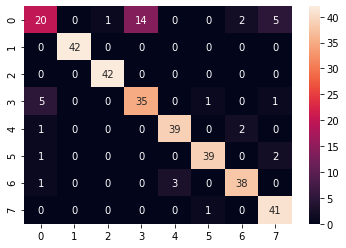

In [ ]:
import seaborn as sns
sns.heatmap(cm2, annot=True)

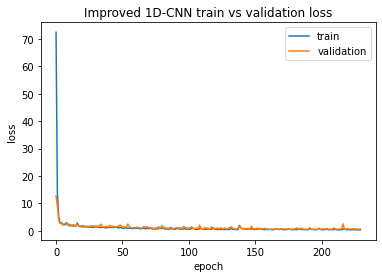

In [ ]:
plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])
plt.title('Improved 1D-CNN train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

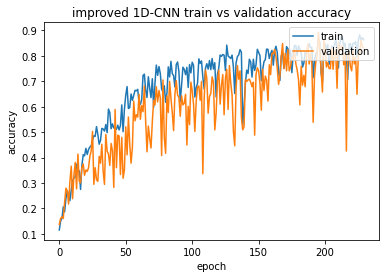

In [ ]:
plt.plot(model2_history.history['accuracy'])
plt.plot(model2_history.history['val_accuracy'])
plt.title('improved 1D-CNN train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

2-L-1D-CNN

In [ ]:
model3 = Sequential()
model3.add(Conv1D(128,10 , activation="relu",strides=1,input_shape=(32,2)))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Conv1D(128,10 , activation="relu",strides=1))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(80, activation="relu"))
model3.add(Dense(8, activation = 'softmax'))
model3.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = "adam",
              metrics = ['accuracy']
              )

In [ ]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_27 (Conv1D)           (None, 23, 128)           2688      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 11, 128)           0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 2, 128)            163968    
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 80)                10320     
_________________________________________________________________
dense_24 (Dense)             (None, 8)                

In [ ]:
batch_size=64
epochs=225
model3_history=model3.fit(x_train, y_train,
                          batch_size,
                          epochs=epochs,
                          validation_data=(x_test, y_test)
                          )

Train on 2400 samples, validate on 336 samples
Epoch 1/225
2400/2400 [==============================] - 2s 671us/step - loss: 34.9501 - accuracy: 0.1200 - val_loss: 10.1367 - val_accuracy: 0.1369
Epoch 2/225
2400/2400 [==============================] - 1s 611us/step - loss: 4.3568 - accuracy: 0.1317 - val_loss: 2.6202 - val_accuracy: 0.1577
Epoch 3/225
2400/2400 [==============================] - 1s 610us/step - loss: 2.2342 - accuracy: 0.1650 - val_loss: 2.1851 - val_accuracy: 0.1845
Epoch 4/225
2400/2400 [==============================] - 1s 611us/step - loss: 2.0080 - accuracy: 0.2021 - val_loss: 2.0273 - val_accuracy: 0.2440
Epoch 5/225
2400/2400 [==============================] - 1s 611us/step - loss: 2.0502 - accuracy: 0.1979 - val_loss: 2.0030 - val_accuracy: 0.2173
Epoch 6/225
2400/2400 [==============================] - 1s 594us/step - loss: 1.9601 - accuracy: 0.2225 - val_loss: 2.0890 - val_accuracy: 0.2173
Epoch 7/225
2400/2400 [==============================] - 1s 606us/ste

In [ ]:

acc3 = model3.evaluate(x_train, y_train)

2400/2400 [==============================] - 0s 73us/step


In [ ]:
print("Loss:", acc3[0], " Accuracy:", acc3[1])

Loss: 0.5024164202809334  Accuracy: 0.8183333277702332


In [ ]:
val_acc3 = model3.evaluate(x_test, y_test)

336/336 [==============================] - 0s 80us/step


In [ ]:
print("Loss:", val_acc3[0], " Accuracy:", val_acc3[1])

Loss: 0.682296009290786  Accuracy: 0.8571428656578064


In [ ]:
pred3 = model3.predict(x_test)
pred_y3 = pred3.argmax(axis=-1)

In [ ]:
cm3 = confusion_matrix(y_test, pred_y3)
print(cm3)

[[26  0  0  9  0  4  0  3]
 [ 0 42  0  0  0  0  0  0]
 [ 0  0 41  0  0  1  0  0]
 [ 1  0  0 37  1  3  0  0]
 [ 8  0  0  0 29  0  5  0]
 [ 0  0  1  0  0 38  0  3]
 [ 6  0  0  0  0  0 36  0]
 [ 1  0  0  0  0  2  0 39]]


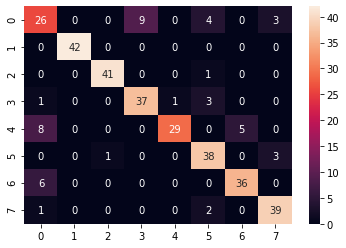

In [ ]:
import seaborn as sns
sns.heatmap(cm3, annot=True)

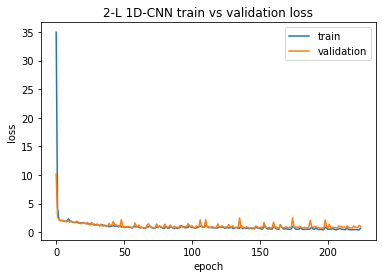

In [ ]:
plt.plot(model3_history.history['loss'])
plt.plot(model3_history.history['val_loss'])
plt.title('2-L 1D-CNN train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

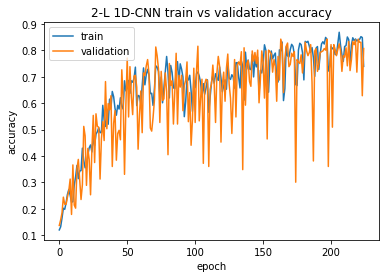

In [ ]:
plt.plot(model3_history.history['accuracy'])
plt.plot(model3_history.history['val_accuracy'])
plt.title('2-L 1D-CNN train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

3-L-1D-CNN

In [ ]:
model5 = Sequential()
model5.add(Conv1D(80,3 , activation="relu",input_shape=(32,2)))
model5.add(MaxPooling1D(pool_size=2))
model5.add(Conv1D(112,3 , activation="relu"))
model5.add(MaxPooling1D(pool_size=2))
model5.add(Conv1D(64,3 , activation="relu"))
model5.add(MaxPooling1D(pool_size=1))
model5.add(Flatten())
model5.add(Dense(48,activation="relu"))
model5.add(Dense(8, activation = 'softmax'))
model5.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']
              )

In [ ]:
model5.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_44 (Conv1D)           (None, 30, 80)            560       
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 15, 80)            0         
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 13, 112)           26992     
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 6, 112)            0         
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 4, 64)             21568     
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 4, 64)             0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 256)             

In [ ]:
batch_size=64
epochs=200
model5_history=model5.fit(x_train, y_train,
                          batch_size,
                          epochs=epochs,
                          validation_data=(x_test, y_test)
                          )

Train on 2400 samples, validate on 336 samples
Epoch 1/200
2400/2400 [==============================] - 1s 321us/step - loss: 13.3919 - accuracy: 0.1200 - val_loss: 3.6647 - val_accuracy: 0.1310
Epoch 2/200
2400/2400 [==============================] - 1s 229us/step - loss: 2.8504 - accuracy: 0.1562 - val_loss: 2.7949 - val_accuracy: 0.2440
Epoch 3/200
2400/2400 [==============================] - 1s 231us/step - loss: 2.4452 - accuracy: 0.1637 - val_loss: 2.2867 - val_accuracy: 0.1458
Epoch 4/200
2400/2400 [==============================] - 1s 225us/step - loss: 2.2381 - accuracy: 0.1696 - val_loss: 2.3116 - val_accuracy: 0.1577
Epoch 5/200
2400/2400 [==============================] - 1s 228us/step - loss: 2.2009 - accuracy: 0.2008 - val_loss: 2.4479 - val_accuracy: 0.1667
Epoch 6/200
2400/2400 [==============================] - 1s 237us/step - loss: 2.0552 - accuracy: 0.2042 - val_loss: 1.9933 - val_accuracy: 0.2589
Epoch 7/200
2400/2400 [==============================] - 1s 232us/step

In [ ]:
acc5 = model5.evaluate(x_train, y_train)

2400/2400 [==============================] - 0s 78us/step


In [ ]:
print("Loss:", acc5[0], " Accuracy:", acc5[1])

Loss: 0.33787116984526316  Accuracy: 0.8354166746139526


In [ ]:
val_acc5 = model5.evaluate(x_test, y_test)

336/336 [==============================] - 0s 96us/step


In [ ]:
print("Loss:", val_acc5[0], " Accuracy:", val_acc5[1])

Loss: 0.7048789603369576  Accuracy: 0.75


In [ ]:
pred5 = model5.predict(x_test)
pred_y5 = pred5.argmax(axis=-1)

In [ ]:
cm5 = confusion_matrix(y_test, pred_y5)
print(cm5)

[[15  1 14 11  0  0  1  0]
 [ 0 41  1  0  0  0  0  0]
 [ 3  0 39  0  0  0  0  0]
 [11  0 10 19  0  0  0  2]
 [ 1  0  3  1 34  0  2  1]
 [ 1  0 11  0  0 30  0  0]
 [ 1  0  3  0  0  0 38  0]
 [ 0  1  3  1  0  1  0 36]]


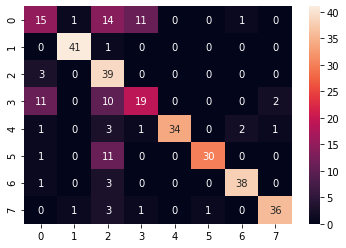

In [ ]:
import seaborn as sns
sns.heatmap(cm5, annot=True)

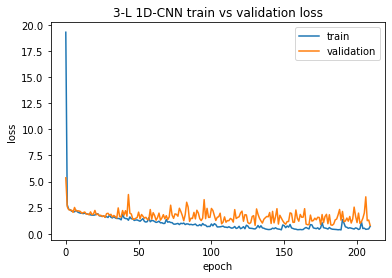

In [ ]:
plt.plot(model5_history.history['loss'])
plt.plot(model5_history.history['val_loss'])
plt.title('3-L 1D-CNN train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

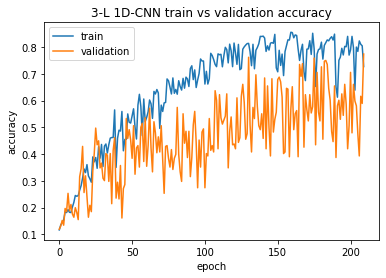

In [ ]:
plt.plot(model5_history.history['accuracy'])
plt.plot(model5_history.history['val_accuracy'])
plt.title('3-L 1D-CNN train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

ANN

In [ ]:
model4=Sequential()
model4.add(Flatten(input_shape=(32,2)))
model4.add(Dense(448,kernel_initializer='he_uniform',activation='relu',input_dim=2))
model4.add(Dense(448,kernel_initializer='he_uniform',activation='relu'))
model4.add(Dense(8,activation='softmax'))
model4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size=64
epochs=300
model4_history=model4.fit(x_train, y_train,
                          batch_size=32,
                          epochs=epochs,
                          validation_data=(x_test, y_test)
                          )

In [ ]:
acc4 = model4.evaluate(x_train, y_train)

2400/2400 [==============================] - 0s 64us/step


In [ ]:
print("Loss:", acc4[0], " Accuracy:", acc4[1])

Loss: 0.38804240902264914  Accuracy: 0.8062499761581421


In [ ]:
val_acc4 = model4.evaluate(x_test, y_test)

336/336 [==============================] - 0s 96us/step


In [ ]:
print("Loss:", val_acc4[0], " Accuracy:", val_acc4[1])

Loss: 0.668267914227077  Accuracy: 0.7797619104385376


In [ ]:
pred4 = model4.predict(x_test)
pred_y4 = pred4.argmax(axis=-1)

In [ ]:
cm4 = confusion_matrix(y_test, pred_y4)
print(cm4)

[[ 2  0  1 38  0  0  0  1]
 [ 0 42  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0]
 [ 1  0  0 41  0  0  0  0]
 [ 0  0  0  0 31  0 11  0]
 [ 0  0  0  0  0 33  0  9]
 [ 0  0  0  0  5  0 37  0]
 [ 0  4  0  0  0  4  0 34]]


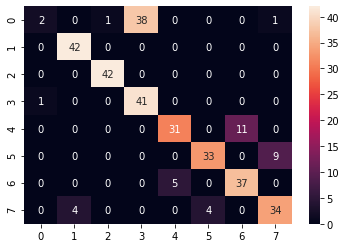

In [ ]:
import seaborn as sns
sns.heatmap(cm4, annot=True)

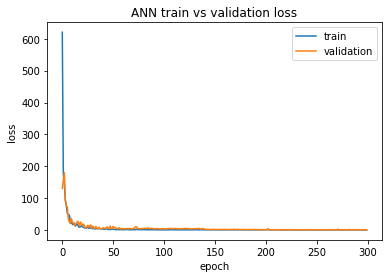

In [ ]:
plt.plot(model4_history.history['loss'])
plt.plot(model4_history.history['val_loss'])
plt.title('ANN train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

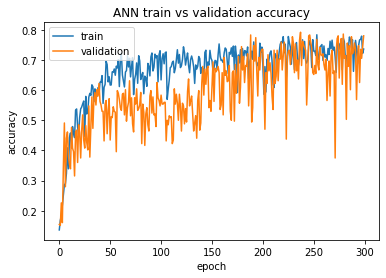

In [ ]:
plt.plot(model4_history.history['accuracy'])
plt.plot(model4_history.history['val_accuracy'])
plt.title('ANN train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()